## Feature extraction 

In [82]:
from jl_song_data import SongData 
import pandas as pd

In [83]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [84]:
df = data.df

In [85]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Customise plotting 

In [86]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')

## Chord Objects column 

We have a input string representing an array of chords. We must convert it to a list of objects of type ExtendedChord (see jl_extended_chord.py). It is an expensive process, so we will store these data temporarly in a column to improve performance

In [87]:
df['chord objects'] = df['chords'].apply(feature_extractor.extract_chord_object_list_removing_non_valid)

In [88]:
first_chord_of_first_song = df['chord objects'].iloc[0][0]

In [89]:
type(first_chord_of_first_song)

jl_extended_chord.ExtendedChord

In [90]:
print(first_chord_of_first_song)

D


##  Extract artist 

In [91]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [92]:
df.sample(5)

,url,name,decade,genre,chords,uuid,chord objects,artist
1992,https://tabs.ultimate-guitar.com/tab/bryan_whi...,God Gave Me You (ver 2),1990s,Country%%Country,"['C', 'G', 'F', 'C', 'G', 'F', 'C', 'G/B', 'Am...",89be9cec-cf81-45be-a71f-519f0c836023,"[C, G, F, C, G, F, C, G/B, Am7, G, F, C, G/B, ...",Bryan White
10008,https://tabs.ultimate-guitar.com/tab/prince/19...,1999,1980s,Rhythm And Blues%%Rhythm And Blues%%Pop,"['Bb/C', 'F9', 'F7', 'F7', 'F7', 'Eb/F', 'F7',...",22c11ad6-a42d-4109-b33e-22ead5b5e3ee,"[Bb/C, F9, F7, F7, F7, Eb/F, F7, Eb/F, F7, F7,...",Prince
3707,https://tabs.ultimate-guitar.com/tab/elton-joh...,Candle In The Wind (ver 3),1970s,Folk,"['D', 'G', 'D', 'G', 'D', 'G', 'D', 'G', 'A', ...",7a76f394-9675-4c69-8285-6bd8d9fcd5c0,"[D, G, D, G, D, G, D, G, A, A7, D, G, D, A, G,...",Elton John
6608,https://tabs.ultimate-guitar.com/tab/johnny-ca...,I Wont Back Down,2000s,Country,"['A', 'A', 'F#m', 'E', 'A', 'F#m', 'E', 'A', '...",d9eebc5f-c535-4067-9e9a-152db0f3341a,"[A, A, F#m, E, A, F#m, E, A, F#m, E, D, F#m, E...",Johnny Cash
345,https://tabs.ultimate-guitar.com/tab/adele/rig...,Right As Rain (ver 3),2000s,Rhythm And Blues,"['Em7', 'Dmaj7', 'Em7', 'Dmaj7', 'Em7', 'Dmaj7...",ae2177e8-20a0-473b-bb55-409cb7a8e8f2,"[Em7, Dmaj7, Em7, Dmaj7, Em7, Dmaj7, Em7, Dmaj...",Adele


## Extract decade as numeric 

In [93]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [94]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [95]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Remove duplicate genres

In [96]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'] = df['genre'].apply(remove_duplicate_genre_inside_cell)

In [97]:
import jl_io as io

genres = io.from_file('../data/genres')

In [98]:
genre_names = [genre['name'] for genre in genres]
genre_names

['Rock',
 'Folk',
 'Pop',
 'Country',
 'Electronic',
 'Rhythm And Blues',
 'Metal',
 'Contemporary R&b',
 'Religious Music',
 'Hip Hop',
 'Reggae',
 'Jazz',
 'Blues',
 'World Music',
 'Disco',
 'Comedy',
 'New Age',
 'Classical',
 'Experimental',
 'Darkwave',
 'Soundtrack']

In [99]:
genre_df = pd.DataFrame(genre_names, columns=['genre'])

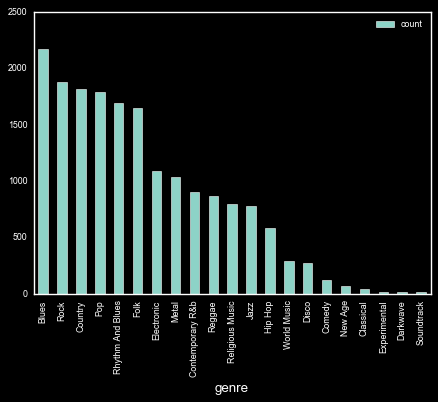

In [100]:
genre_df['count'] = genre_df['genre'].apply( \
    lambda genre: len(df[df['genre'].str.contains(genre)]))

genre_df.sort_values(by='count', ascending=False).plot.bar(x='genre', y=f'count')

In genre statistics, we will remove genres with few data (from comedy to soundtrack)

In [101]:
limit_count = genre_df[genre_df['genre']=='Disco']['count'].values[0]
limit_count

274

In [102]:
genre_df = genre_df[genre_df['count'] >= limit_count]

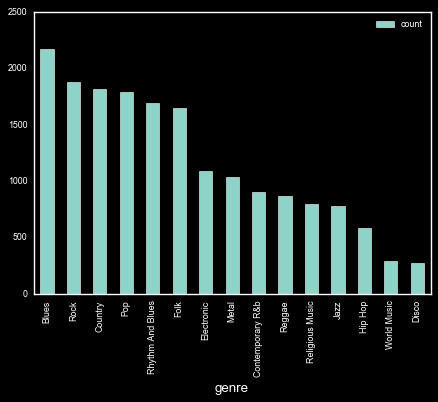

In [103]:
genre_df.sort_values(by='count', ascending=False).plot.bar(x='genre', y=f'count')

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [104]:
df['cardinality'] = df['chord objects'].apply(feature_extractor.extract_cardinality)

In [105]:
df.sample(5)

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality
8112,https://tabs.ultimate-guitar.com/tab/mandolin-...,There Was A Time,2010,Country,"['Am', 'Fmaj7/C', 'C/G', 'G', 'Am', 'Fmaj7/C',...",45003438-69a9-4eae-8a1e-5ba7efc5e5be,"[Am, Fmaj7/C, C/G, G, Am, Fmaj7/C, C/G, Fmaj7/...",Mandolin Orange,95
5427,https://tabs.ultimate-guitar.com/tab/hillsong-...,All I Need Is You (ver 2),2000,Religious Music,"['Am', 'Dm', 'F', 'G', 'Am', 'C', 'G', 'Am', '...",333b0677-c848-4d45-b19d-74fe4a9d76db,"[Am, Dm, F, G, Am, C, G, Am, Dm, F, G, Am, C, ...",Hillsong United,22
13875,https://tabs.ultimate-guitar.com/tab/wilco/imp...,Impossible Germany,2000,Country,"['Cmaj7', 'G', 'Em7', 'Am7', 'Am7', 'Am7', 'Cm...",7b181d27-2ff8-401e-9303-aa7a1541c922,"[Cmaj7, G, Em7, Am7, Am7, Am7, Cmaj7, G, Em7, ...",Wilco,49
2043,https://tabs.ultimate-guitar.com/tab/buena_vis...,Y Tu Que Has Hecho,1990,Jazz%%World Music,"['Bb7', 'Gm', 'G', 'Ab', 'Bb', 'Eb', 'F7', 'Bb...",cd28ebcd-b24f-4f68-a975-c67c44d01361,"[Bb7, Gm, G, Ab, Bb, Eb, F7, Bb7, Eb, Bb7, Gm,...",Buena Vista Social Club,67
1611,https://tabs.ultimate-guitar.com/tab/bob_dylan...,The Man In Me,1970,Folk,"['G', 'Am', 'D', 'C', 'G', 'G', 'Am', 'D', 'C'...",d7d11471-a928-437b-8a77-56531d103253,"[G, Am, D, C, G, G, Am, D, C, G, G, Am, D, C, ...",Bob Dylan,62


In [106]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [107]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,[],Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,[],883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,[],883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,[],Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,[],Abba,0
...,...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,[],The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,[],Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,[],Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Pop%%Rhythm And Blues,[],f0a72548-c85e-4848-bf60-af2e62993f5d,[],Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [108]:
df = df[df['cardinality'] != 0]

In [109]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

We will also remove songs with only one chord (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [110]:
df = df[df['cardinality'] != 1]

In [111]:
df['cardinality'].describe()

count    14038.000000
mean        85.984115
std         68.602188
min          2.000000
25%         51.000000
50%         77.500000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [112]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [113]:
df['cardinality'].sum()

1207045

In [114]:
import matplotlib.pyplot as plt

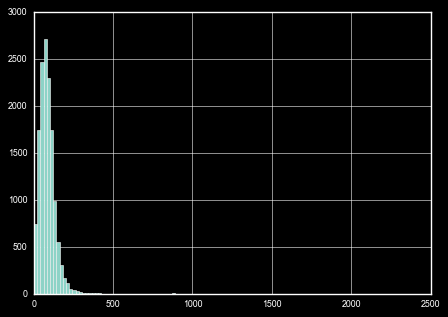

In [115]:
df['cardinality'].hist(bins=100)

#### By genre 

In [116]:
def plot_mean_by_genre(column_name):
    genre_df[f'avg {column_name}'] = genre_df['genre'].apply( \
        lambda genre: df[df['genre'].str.contains(genre)][column_name].mean())
    
    genre_df.sort_values(by=f'avg {column_name}', ascending=False).plot.bar(x='genre', y=f'avg {column_name}')
    

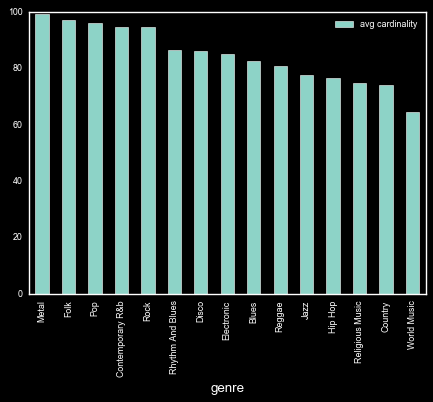

In [117]:
plot_mean_by_genre('cardinality')

#### By decade 

In [118]:
def plot_mean_by_decade(feature):
    df.groupby('decade')[feature].mean().plot.bar()

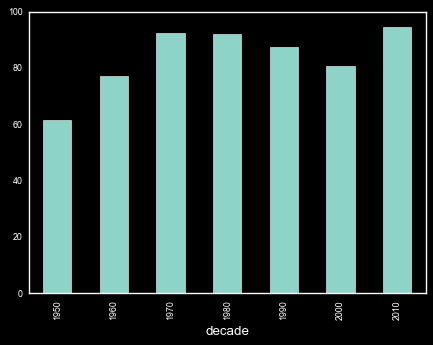

In [119]:
plot_mean_by_decade('cardinality')

### Unique cardinality (number of different chords) 

In [120]:
df['unique cardinality'] = df['chord objects'].apply(feature_extractor.extract_unique_cardinality)

In [121]:
df['unique cardinality'].describe()

count    14038.000000
mean         7.174669
std          4.614989
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         72.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [122]:
df['unique cardinality'].mode()

0    4
dtype: int64

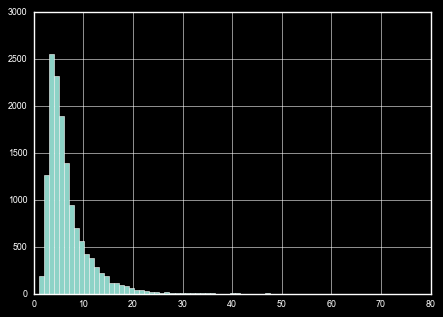

In [123]:
df['unique cardinality'].hist(bins=70)

#### By genre 

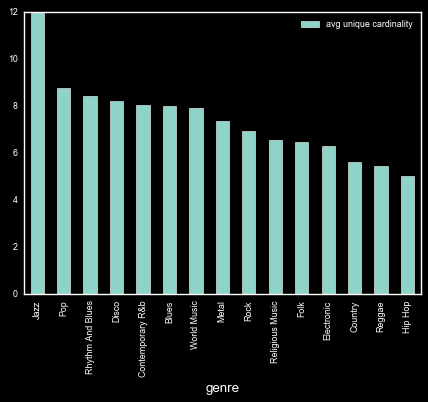

In [124]:
plot_mean_by_genre('unique cardinality')

#### By decade 

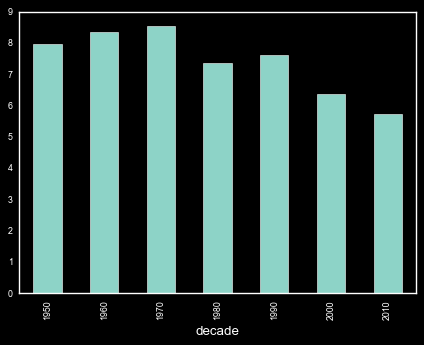

In [125]:
plot_mean_by_decade('unique cardinality')

### Mode

Major :)

Minor :(

Neutral :|

In [126]:
from jl_extended_chord import ChordMode

In [127]:
df['major cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [128]:
df['minor cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [129]:
df['neutral cardinality'] =\
df['chord objects'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [130]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14038.000000
mean        60.772617
std         51.957886
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


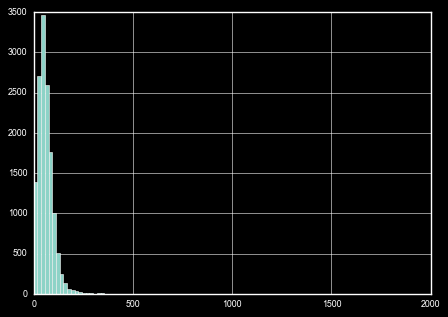

In [131]:
show_info(df['major cardinality'])

count    14038.000000
mean        22.585625
std         27.372958
min          0.000000
25%          5.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


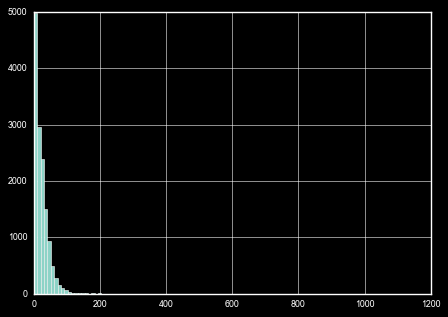

In [132]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14038.000000
mean         2.625873
std         12.158898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


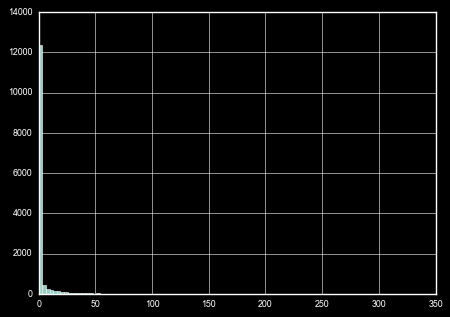

In [133]:
show_info(df['neutral cardinality'])

In [134]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,chord objects,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"['E5', 'G5', 'A5', 'C5', 'D5', 'C5', 'E5', 'C5...",564b6999-b037-4758-9b15-3adc9b88357a,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",Scorpions,318,5,0,0,318


Scorpions like neutral chords... :)

### Sadness  

Let's use previous features to calculate a new feature: `sadness`

In [135]:
df['sadness'] = (df['minor cardinality'] / df['cardinality'])


In [136]:
df['sadness'].describe()

count    14038.000000
mean         0.257394
std          0.202100
min          0.000000
25%          0.096774
50%          0.243746
75%          0.375000
max          1.000000
Name: sadness, dtype: float64

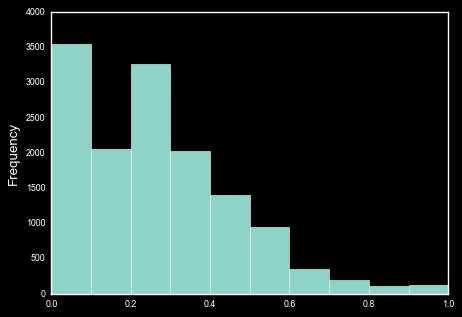

In [137]:
df['sadness'].plot.hist()

In [138]:
df[df['genre'].str.contains('Metal')]['sadness'].mean()

0.2787988934417069

In [139]:
df[df['genre'].str.contains('Jazz')]['sadness'].mean()

0.3178758089746847

In [140]:
df[df['genre'].str.contains('Pop')]['sadness'].mean()

0.2742307112838404

In [141]:
df[df['genre'].str.contains('Rock')]['sadness'].mean()

0.21933666795532078

#### By genre 

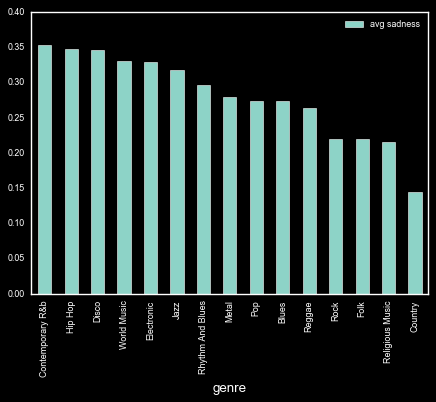

In [142]:
plot_mean_by_genre('sadness')

####  By decade

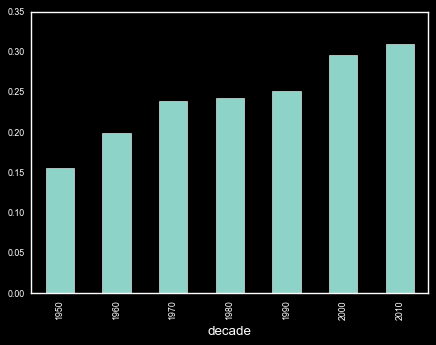

In [143]:
plot_mean_by_decade('sadness')

Los modernos somos unos tristes

### Harmonic mean 

In [144]:
df['harmonic mean X'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_x)

In [148]:
df['harmonic mean Y'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_y)

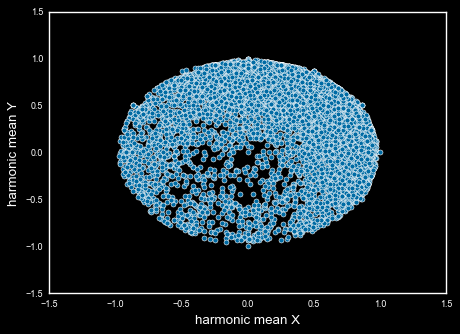

In [149]:
df.plot.scatter(x='harmonic mean X', y='harmonic mean Y')

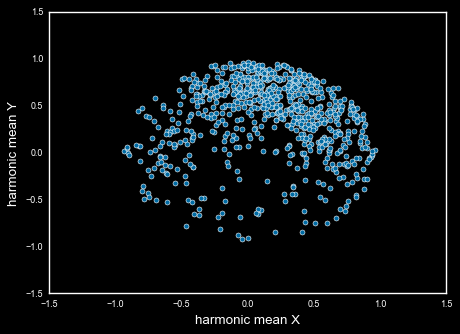

In [150]:
df[df['genre'].str.contains('Jazz')].plot.scatter(x='harmonic mean X', y='harmonic mean Y')

In [151]:
df['harmonic mean position'] = df['chord objects'].apply(feature_extractor.extract_harmonic_mean_position)

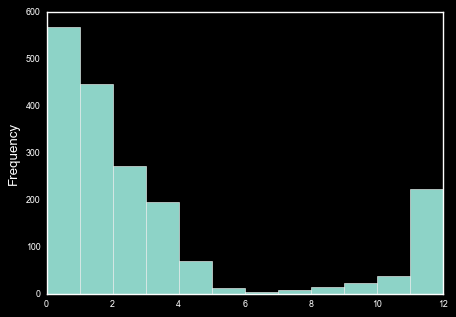

In [152]:
df[df['genre'].str.contains('Rock')]['harmonic mean position'].plot.hist(bins=12)

### Widths 

In [153]:
 df['subdominant width'] = df['chord objects'].apply(feature_extractor.extract_subdominant_width)

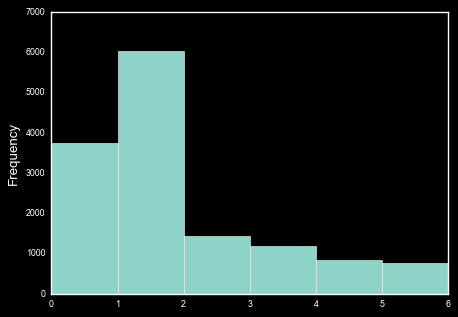

In [154]:
 df['subdominant width'].plot.hist(bins=6)

In [155]:
df['dominant width'] = df['chord objects'].apply(feature_extractor.extract_dominant_width)

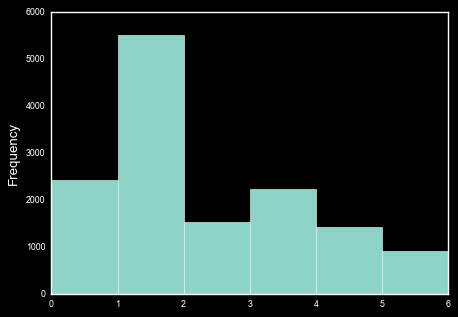

In [156]:
df['dominant width'].plot.hist(bins=6)

In [157]:
df['harmonic width'] =  df['subdominant width'] + df['dominant width']

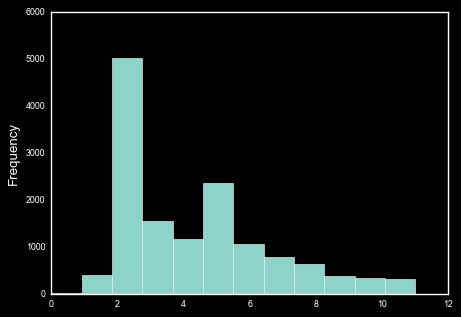

In [158]:
df['harmonic width'].plot.hist(bins=12)

#### By genre 

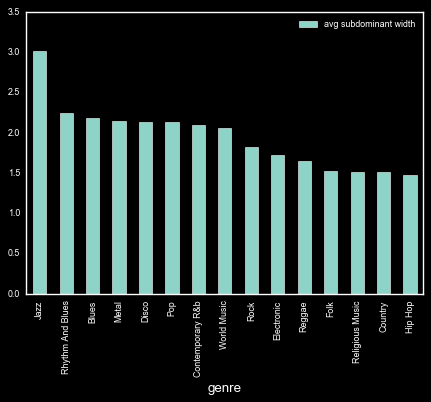

In [159]:
plot_mean_by_genre('subdominant width')

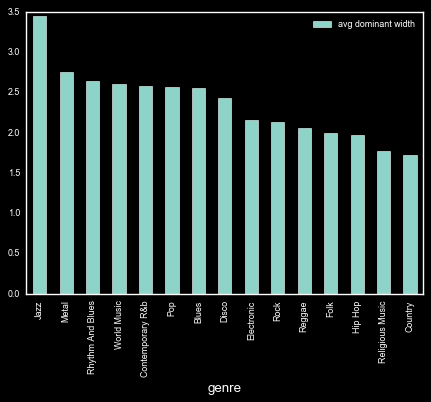

In [160]:
plot_mean_by_genre('dominant width')

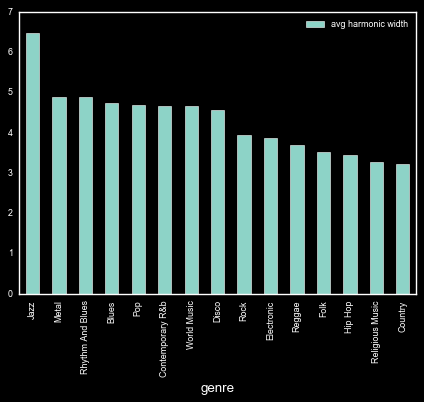

In [161]:
plot_mean_by_genre('harmonic width')

#### By decade 

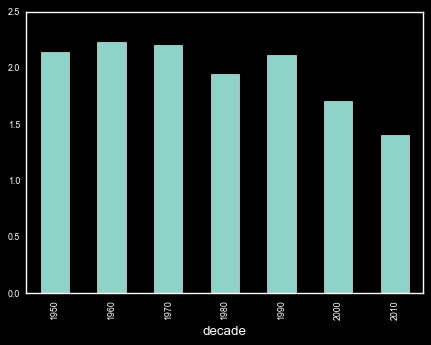

In [162]:
plot_mean_by_decade('subdominant width')

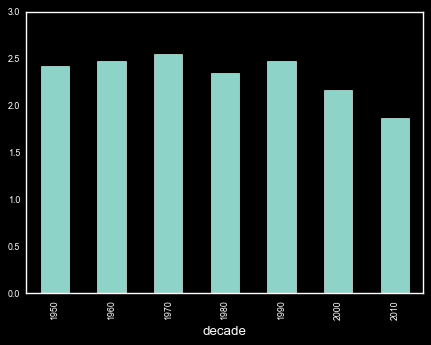

In [163]:
plot_mean_by_decade('dominant width')

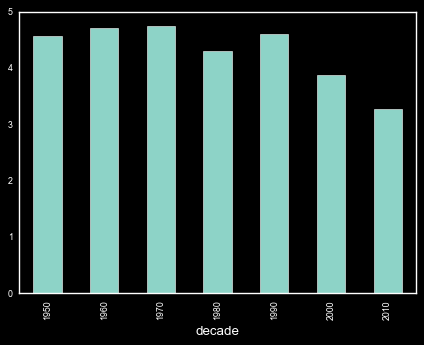

In [164]:
plot_mean_by_decade('harmonic width')

### Complexity 

In [165]:
 df['complexity'] = df['chord objects'].apply(feature_extractor.extract_complexity)

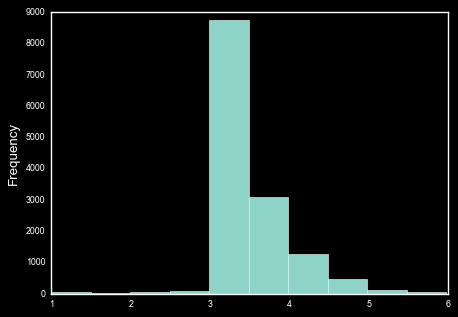

In [166]:
df['complexity'].plot.hist()

#### By genre 

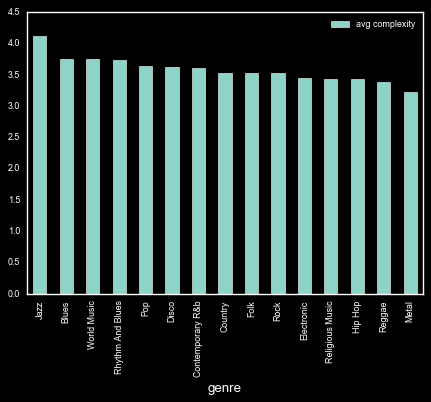

In [167]:
plot_mean_by_genre('complexity')

#### By decade 

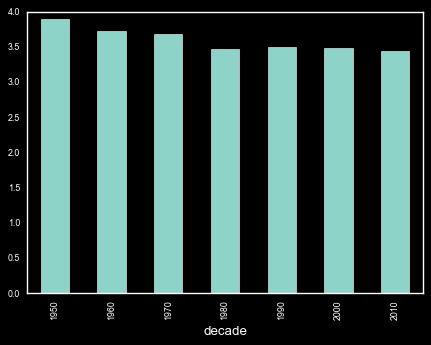

In [168]:
plot_mean_by_decade('complexity')

In [169]:
df[df['genre'].str.contains('Jazz')].groupby('decade')['url'].count()

decade
1950    204
1960    192
1970     70
1980     38
1990     74
2000    145
2010     52
Name: url, dtype: int64

### Slash chord distrbution 

In [171]:
df['slash chords'] = df['chord objects'].apply(feature_extractor.extract_relative_on_list)

In [172]:
set(df['slash chords'].sum())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

All the notes are included as slash chord...!

In [173]:
list(range(0,12))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [174]:
slash_df = pd.DataFrame(list(range(0,12)), columns=['slash in semitones'])

In [175]:
slash_df

,slash in semitones
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [176]:
slash_df['count'] = slash_df['slash in semitones'].apply( \
    lambda slash: len(df[df['slash chords'].apply( \
            lambda slashes: slash in slashes)] ))

In [177]:
slash_df

,slash in semitones,count
0,0,17
1,1,36
2,2,498
3,3,287
4,4,1713
5,5,376
6,6,39
7,7,1027
8,8,96
9,9,263


In [178]:
from music21.interval import Interval
from music21.note import Note

In [179]:
slash_df['interval'] = slash_df['slash in semitones'].apply(lambda st: Interval(noteStart=Note(0),noteEnd=Note(st)).name)

In [180]:
slash_df

,slash in semitones,count,interval
0,0,17,P1
1,1,36,A1
2,2,498,M2
3,3,287,m3
4,4,1713,M3
5,5,376,P4
6,6,39,A4
7,7,1027,P5
8,8,96,A5
9,9,263,M6


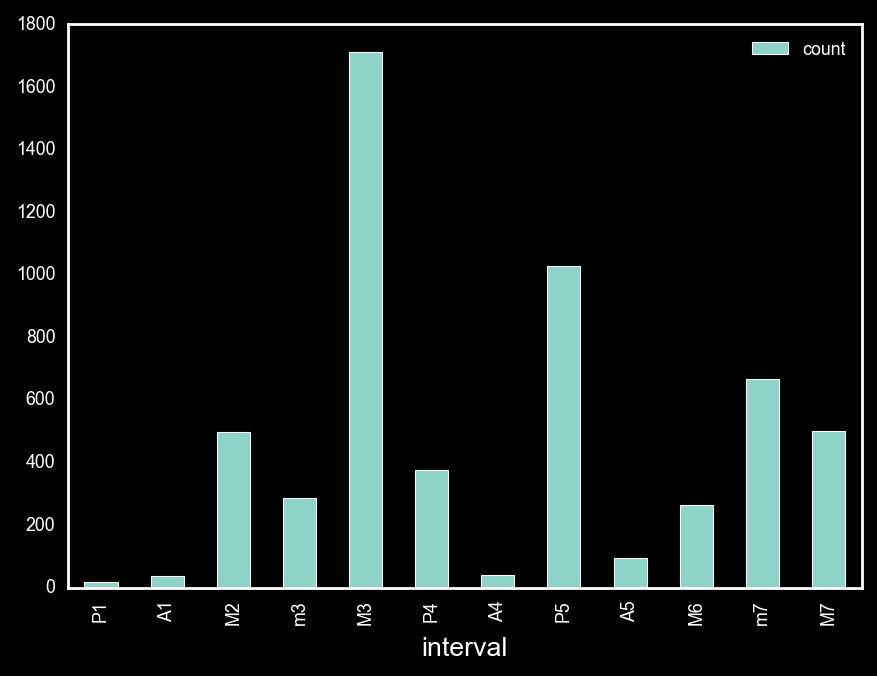

In [181]:
slash_df.plot.bar(x='interval', y='count')

We won't include slash chord information in the RNN in order to simplify the problem. The consequnece is that the composed music will be less rich

In [182]:
songs_without_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) == 0)])
songs_without_slash_chords

11019

In [183]:
songs_with_slash_chords = len(df[df['slash chords'].apply(lambda slashes: len(slashes) > 0)])
songs_with_slash_chords

3019